In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, roc_auc_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer 
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, ConfusionMatrixDisplay, classification_report
)
from sklearn.preprocessing import StandardScaler, OneHotEncoder 
import sys
sys.path.append('../src')
from EvaluationFunction import evaluate_model
from OptunaXGB import objective
import optuna
import joblib



In [38]:
# 
RANDOM_STATE = 42

In [39]:
# Load preprocessed data
df_cleaned = pd.read_csv("../data/preprocessed_data.csv")

In [40]:
# Split features and target variable
X = df_cleaned.drop('Exited', axis=1)
y = df_cleaned['Exited']

In [41]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y
 )

In [42]:
# Identify numerical and categorical variables
num_var = X_train.select_dtypes(include=np.number).columns.tolist()
cat_var = X_train.select_dtypes(include='object').columns.tolist()

In [43]:
# Define preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
         ('num', StandardScaler(), num_var),           
         ('cat', OneHotEncoder(handle_unknown='ignore'), cat_var)
     ]
 )

In [44]:
# Print class weight for XGBoost
neg_count = (y_train == 0).sum()
pos_count = (y_train == 1).sum()
scale_pos_weight = neg_count / pos_count

print(f"Taille de l'ensemble d'entraînement : {X_train.shape}")
print(f"Taux de désabonnement (y_train) : {pos_count / len(y_train) * 100:.2f}%")
print(f"Poids de classe (scale_pos_weight) pour XGBoost : {scale_pos_weight:.2f}")

Taille de l'ensemble d'entraînement : (12000, 21)
Taux de désabonnement (y_train) : 19.93%
Poids de classe (scale_pos_weight) pour XGBoost : 4.02


In [45]:
# 
N_TRIALS = 2 
print(f"Démarrage de l'optimisation Optuna pour {N_TRIALS} essais...")

study = optuna.create_study(direction='maximize') 
study.optimize(lambda trial: objective(trial, X_train, y_train, preprocessor, scale_pos_weight), 
               n_trials=N_TRIALS, 
               show_progress_bar=True)


[I 2025-12-07 11:38:37,549] A new study created in memory with name: no-name-c235c2de-5bd5-421f-b190-477c470c1788


Démarrage de l'optimisation Optuna pour 2 essais...


  0%|          | 0/2 [00:00<?, ?it/s]

h:\Desktop\Bilal CV\MOSEF\Project Mosef older\churn-prediction-banking\notebooks\../src\OptunaXGB.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.2), # Fine-tuning du taux d'apprentissage
h:\Desktop\Bilal CV\MOSEF\Project Mosef older\churn-prediction-banking\notebooks\../src\OptunaXGB.py:24: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
h:\Desktop\Bilal CV\MOSEF\Project Mosef older\churn-prediction-banking\notebooks\../src\OptunaXGB.py:25: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github

[I 2025-12-07 11:39:02,330] Trial 0 finished with value: 0.9214368698397326 and parameters: {'n_estimators': 1335, 'max_depth': 10, 'learning_rate': 0.03751546883761913, 'subsample': 0.8684599823641225, 'colsample_bytree': 0.6984633386955599, 'min_child_weight': 15, 'gamma': 0.0021061200221397006, 'reg_alpha': 0.1604466193773474, 'reg_lambda': 0.04585616901737362}. Best is trial 0 with value: 0.9214368698397326.


h:\Desktop\Bilal CV\MOSEF\Project Mosef older\churn-prediction-banking\notebooks\../src\OptunaXGB.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.2), # Fine-tuning du taux d'apprentissage
h:\Desktop\Bilal CV\MOSEF\Project Mosef older\churn-prediction-banking\notebooks\../src\OptunaXGB.py:24: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
h:\Desktop\Bilal CV\MOSEF\Project Mosef older\churn-prediction-banking\notebooks\../src\OptunaXGB.py:25: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github

[I 2025-12-07 11:39:13,016] Trial 1 finished with value: 0.9293445450186191 and parameters: {'n_estimators': 1148, 'max_depth': 5, 'learning_rate': 0.029206607618204327, 'subsample': 0.9094372760076832, 'colsample_bytree': 0.8079017448080508, 'min_child_weight': 12, 'gamma': 0.00019227807995373893, 'reg_alpha': 6.154862469821651e-05, 'reg_lambda': 0.2766660131487416}. Best is trial 1 with value: 0.9293445450186191.


In [50]:
print("\n===== BEST XGBoost RESULTS =====")
print(f"Best ROC AUC (CV): {study.best_value:.4f}")
print("Best Hyperparameters:")
for k, v in study.best_params.items():
    print(f"  - {k}: {v}")

best_params = study.best_params



===== BEST XGBoost RESULTS =====
Best ROC AUC (CV): 0.9293
Best Hyperparameters:
  - n_estimators: 1148
  - max_depth: 5
  - learning_rate: 0.029206607618204327
  - subsample: 0.9094372760076832
  - colsample_bytree: 0.8079017448080508
  - min_child_weight: 12
  - gamma: 0.00019227807995373893
  - reg_alpha: 6.154862469821651e-05
  - reg_lambda: 0.2766660131487416


In [51]:
# Ajouter scale_pos_weight aux meilleurs paramètres
best_params['scale_pos_weight'] = scale_pos_weight

# Modèle final
final_xgb_model = XGBClassifier(
    **best_params,
    random_state=RANDOM_STATE,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Pipeline final
final_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', final_xgb_model)
])

print("\n=> Training final optimized model on X_train...")
final_pipeline.fit(X_train, y_train)
print("=> Training completed.")



=> Training final optimized model on X_train...


c:\Users\CYTech Student\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:41:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


=> Training completed.


Accuracy: 0.874
Precision: 0.6506849315068494
Recall: 0.794314381270903
F1-score: 0.7153614457831325
AUC: 0.9268419015369022

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      2402
           1       0.65      0.79      0.72       598

    accuracy                           0.87      3000
   macro avg       0.80      0.84      0.82      3000
weighted avg       0.89      0.87      0.88      3000



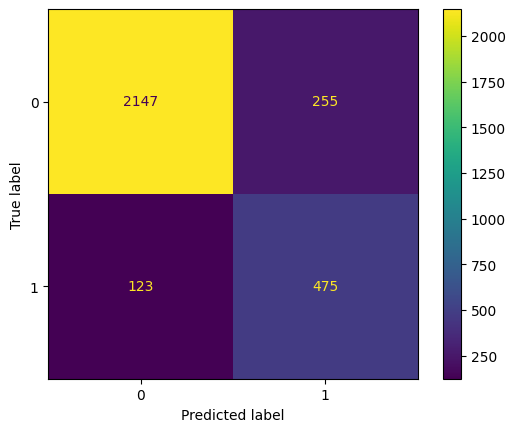

In [52]:
# Prédictions
y_pred = final_pipeline.predict(X_test)
y_proba = final_pipeline.predict_proba(X_test)[:, 1]

# Évaluation
evaluate_model(y_test, y_pred, y_proba)


In [55]:
# 
model_filename = '../models/best_model.pkl'

# 
joblib.dump(final_pipeline, model_filename)

print(f"\nFinal optimized pipeline saved as: {model_filename}")



Final optimized pipeline saved as: ../models/best_model.pkl
